In [2]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display

# Basic Feature Extraction

Somehow, we must extract the characteristics of our audio signal that are most relevant to the problem we are trying to solve. For example, if we want to classify instruments by timbre, we will want features that distinguish sounds by their timbre and not their pitch. If we want to perform pitch detection, we want features that distinguish pitch and not timbre.

This process is known as feature extraction.

Let's begin with twenty audio files: ten kick drum samples, and ten snare drum samples. Each audio file contains one drum hit.

Read and store each signal:

In [6]:
Moisture_14_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_14_*.wav')
]
Moisture_16_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_16_*.wav')
]
Moisture_17_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_17_*.wav')
]

Moisture_19_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_19_*.wav')
]

Moisture_20_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_20_*.wav')
]

In [8]:
len(Moisture_14_percent)

20

In [9]:
len(Moisture_16_percent)

20

In [10]:
len(Moisture_17_percent)

20

In [11]:
len(Moisture_19_percent)

20

In [ ]:
len(Moisture_20_percent)

Display the kick drum signals:

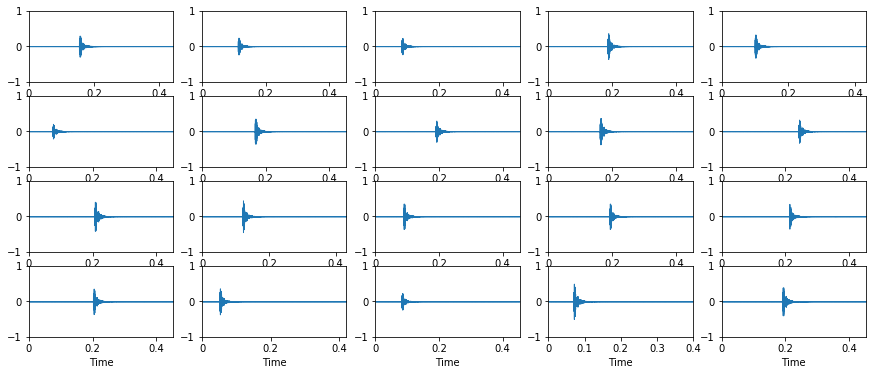

In [17]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(Moisture_14_percent):
    plt.subplot(4, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

Display the snare drum signals:

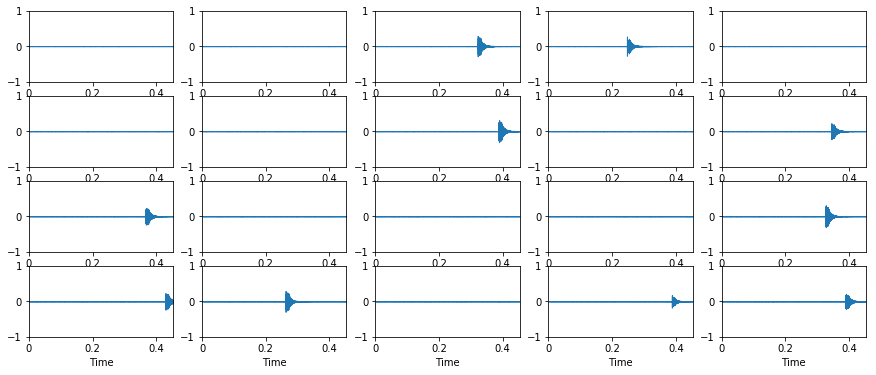

In [18]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(Moisture_20_percent):
    plt.subplot(4, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

## Constructing a Feature Vector

A *feature vector* is simply a collection of features. Here is a simple function that constructs a two-dimensional feature vector from a signal:

In [19]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

If we want to aggregate all of the feature vectors among signals in a collection, we can use a list comprehension as follows:

In [28]:
Moisture_14_percent_features = numpy.array([extract_features(x) for x in Moisture_14_percent])
Moisture_16_percent_features = numpy.array([extract_features(x) for x in Moisture_16_percent])
Moisture_17_percent_features = numpy.array([extract_features(x) for x in Moisture_17_percent])
Moisture_19_percent_features = numpy.array([extract_features(x) for x in Moisture_19_percent])
Moisture_20_percent_features = numpy.array([extract_features(x) for x in Moisture_20_percent])

/home/rutherford/.local/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


Visualize the differences in features by plotting separate histograms for each of the classes:

Text(0,0.5,'Count')

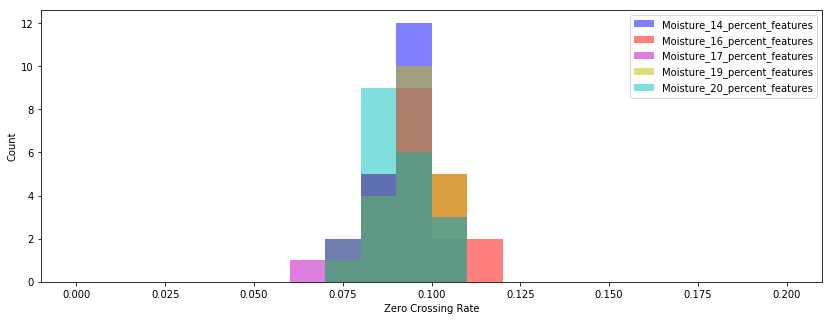

In [33]:
plt.figure(figsize=(14, 5))
plt.hist(Moisture_14_percent_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_16_percent_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_17_percent_features[:,0], color='m', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_19_percent_features[:,0], color='y', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_20_percent_features[:,0], color='c', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('Moisture_14_percent_features', 'Moisture_16_percent_features',
            'Moisture_17_percent_features','Moisture_19_percent_features',
            'Moisture_20_percent_features'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')
 #b,c,r,y,g,m,k

Text(0,0.5,'Count')

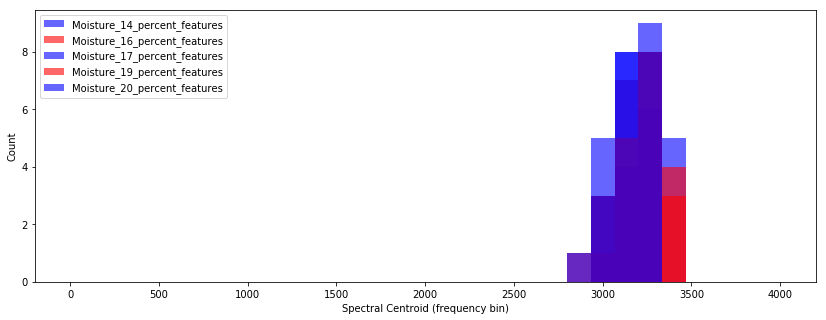

In [34]:
plt.figure(figsize=(14, 5))
plt.hist(Moisture_14_percent_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_16_percent_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_17_percent_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_19_percent_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_20_percent_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('Moisture_14_percent_features','Moisture_16_percent_features',
            'Moisture_17_percent_features','Moisture_19_percent_features',
            'Moisture_20_percent_features'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

## Feature Scaling

The features that we used in the previous example included zero crossing rate and spectral centroid. These two features are expressed using different units. This discrepancy can pose problems when performing classification later. Therefore, we will normalize each feature vector to a common range and store the normalization parameters for later use.  

Many techniques exist for scaling your features. For now, we'll use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).  `MinMaxScaler` returns an array of scaled values such that each feature dimension is in the range -1 to 1.

Let's concatenate all of our feature vectors into one *feature table*:

In [36]:
feature_table = numpy.vstack((Moisture_14_percent_features, Moisture_16_percent_features,
                              Moisture_17_percent_features, Moisture_19_percent_features,
                              Moisture_20_percent_features))
print(feature_table.shape)

(100, 2)


Scale each feature dimension to be in the range -1 to 1:

In [37]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


Plot the scaled features:

Text(0,0.5,'Spectral Centroid')

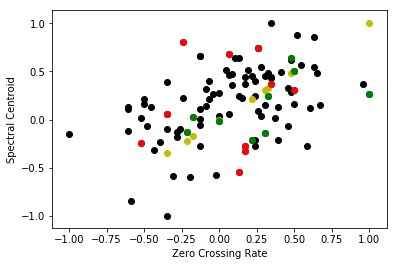

In [62]:
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='k')
plt.scatter(training_features[::10,0], training_features[::10,0], c='y')
plt.scatter(training_features[::10,0], training_features[::10,1], c='g')
plt.scatter(training_features[:10,0], training_features[:10,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')
#b,c,r,y,g,m,k

[&larr; Back to Index](index.html)